In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import statsmodels.api as sm
from scipy.spatial import ConvexHull
from scipy.stats import normaltest, shapiro, anderson, norm, t as t_stud
from sklearn.decomposition import PCA

C:\Users\Dell\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# we use the dataset without duplicated columns

X_train = pd.read_csv('X_train_no_red.csv', header = 0)
y_train = pd.read_fwf('y_train.txt', header = None)
X_test = pd.read_csv('X_test_no_red.csv', header = 0)
y_test = pd.read_fwf('y_test.txt', header = None)

In [5]:
X_train.columns = X_train.columns.astype(int)
X_test.columns = X_test.columns.astype(int)


In [6]:
type(y_test)

pandas.core.frame.DataFrame

In [7]:
with open("features.txt") as f:
    lines = f.read().splitlines()

In [8]:
features = {}
for line in lines:
    idx, name = line.split()
    features[int(idx)-1] = name

In [9]:
with open('activity_labels.txt') as f:
    lines = f.read().splitlines()

activities = {}
for line in lines:
    label, activity = line.split()
    activities[int(label)] = activity

In [10]:
X_train_pca = PCA(2, random_state = 5).fit_transform(X_train)

In [11]:
hull = ConvexHull(X_train_pca)

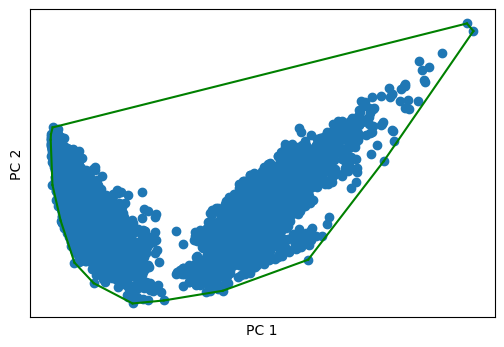

In [12]:
plt.figure(figsize = (6,4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
for edge in hull.simplices:
    plt.plot(X_train_pca[edge, 0], X_train_pca[edge, 1], 'g')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

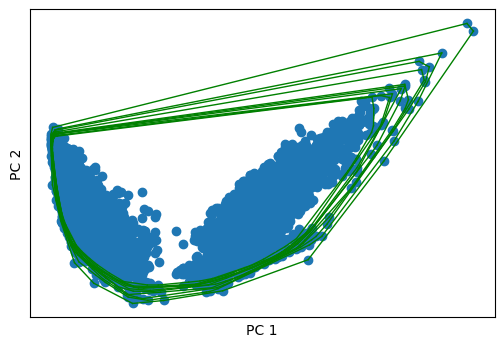

In [13]:
# plot convex hull for the first 10 depths

plt.figure(figsize = (6,4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
df = X_train_pca.copy()
for depth in range(10):
    conv_hull = ConvexHull(df)
    edges = conv_hull.simplices
    for edge in edges:
        plt.plot(df[edge, 0], df[edge, 1], 'g', lw = 1)
    df = np.delete(df, edges, axis = 0)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [14]:
# we could discard the alements at depth 1

outliers_indices = set(hull.simplices.ravel())

In [15]:
outliers_indices.update({2937, 4599, 1813, 2911, 5140, 2937}) # Grubbs
outliers_indices.update(set(outliers_idx_lh))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13264\1681244773.py", line 2, in <module>
    outliers_indices.update(set(outliers_idx_lh))
NameError: name 'outliers_idx_lh' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\

In [16]:
X_train.duplicated().value_counts()

False    7352
dtype: int64

In [17]:
X_test.duplicated().value_counts()

False    2947
dtype: int64

In [18]:
y_train.duplicated().value_counts()

True     7346
False       6
dtype: int64

In [19]:
y_test.duplicated().value_counts()

True     2941
False       6
dtype: int64

In [20]:

print('\n Distinct values:')
print(X_train.nunique())



 Distinct values:
0      7347
1      7352
2      7349
3      7349
4      7351
       ... 
556    7352
557    7352
558    7352
559    7352
560    7352
Length: 540, dtype: int64


In [21]:
print('\n Distinct values:')
print(X_test.nunique())


 Distinct values:
0      2947
1      2947
2      2947
3      2947
4      2947
       ... 
556    2947
557    2947
558    2947
559    2947
560    2947
Length: 540, dtype: int64


In [22]:
print('\n Distinct values:')
print(y_train.nunique())


 Distinct values:
0    6
dtype: int64


In [23]:
print('\n Distinct values:')
print(y_test.nunique())


 Distinct values:
0    6
dtype: int64


In [24]:
# Controllo dei missing values
missing_values = X_train.isna().any()

print(missing_values)

0      False
1      False
2      False
3      False
4      False
       ...  
556    False
557    False
558    False
559    False
560    False
Length: 540, dtype: bool


In [25]:
# Controllo dei missing values
missing_values = X_test.isna().any()

print(missing_values)

0      False
1      False
2      False
3      False
4      False
       ...  
556    False
557    False
558    False
559    False
560    False
Length: 540, dtype: bool


In [26]:
# Controllo dei missing values
missing_values = y_train.isna().any()

print(missing_values)

0    False
dtype: bool


In [27]:
# Controllo dei missing values
missing_values = y_test.isna().any()

print(missing_values)

0    False
dtype: bool


In [28]:
!pip install pyod

In [29]:
from pyod.models.hbos import HBOS

In [30]:
hbos=HBOS()
hbos.fit(X_train)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [31]:
hbos.decision_scores_


array([-594.47112084, -704.84168032, -697.31364891, ..., -176.12598151,
       -169.95908588, -190.952218  ])

In [32]:
outliers_hbos= hbos.predict(X_test)
np.unique(outliers_hbos, return_counts=True)

(array([0, 1]), array([2714,  233], dtype=int64))

In [33]:
X_train.loc[np.where(outliers_hbos==1)]

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
120,0.289727,0.015343,-0.116675,-0.368800,-0.083343,-0.263347,-0.423650,-0.178759,-0.277213,-0.193089,...,0.082892,-0.180428,-0.542152,0.054138,-0.492607,0.615095,0.346940,-0.774100,0.253689,0.031547
121,0.308305,-0.019883,-0.160447,-0.439000,0.003313,-0.208538,-0.485981,-0.063575,-0.223715,-0.180948,...,0.138980,-0.454771,-0.787531,-0.237141,-0.583154,0.121184,-0.140030,-0.780883,0.248986,0.031598
123,0.238411,-0.023196,-0.112552,-0.319937,0.027333,-0.181981,-0.369223,0.012503,-0.190036,-0.050131,...,0.169779,-0.581010,-0.856185,0.615186,0.571300,0.143779,0.240495,-0.779954,0.247869,0.045256
124,0.180194,-0.017797,-0.039347,-0.376543,0.023527,-0.247052,-0.433950,-0.041913,-0.242824,-0.229159,...,0.055714,-0.305550,-0.657652,0.479679,-0.571218,0.435895,-0.435921,-0.771363,0.253337,0.048347
125,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,0.002068,-0.299425,-0.691170,-0.294788,-0.582192,0.046131,-0.112673,-0.768340,0.256712,0.040474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,0.291043,0.011953,-0.112374,-0.990754,-0.937450,-0.978492,-0.992346,-0.939293,-0.979082,-0.929046,...,-0.122248,0.029953,-0.315978,0.021203,0.159770,0.317829,-0.812850,-0.791275,0.234447,-0.030973
2564,0.277444,-0.007489,-0.097290,-0.992280,-0.936861,-0.969754,-0.992875,-0.936107,-0.967025,-0.936299,...,0.063293,-0.531719,-0.855513,0.075828,-0.200629,-0.649701,-0.724720,-0.809769,0.220740,-0.031438
2703,0.156156,0.034978,-0.142021,-0.089228,-0.061432,-0.545452,-0.191327,-0.029776,-0.526252,0.158448,...,0.169650,-0.483741,-0.806974,0.656112,0.250306,0.919446,0.463341,-0.676979,0.318100,-0.020196
2709,0.277290,-0.017410,-0.101546,-0.995880,-0.931689,-0.986776,-0.996242,-0.927642,-0.986723,-0.937759,...,0.097575,-0.646356,-0.912477,0.014094,0.170814,-0.932990,0.855647,-0.908073,0.161528,0.011889


In [34]:
outliers_hbos

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
print("The threshold for the defined comtanimation rate:" , hbos.threshold_)

The threshold for the defined comtanimation rate: -22.02602316358118


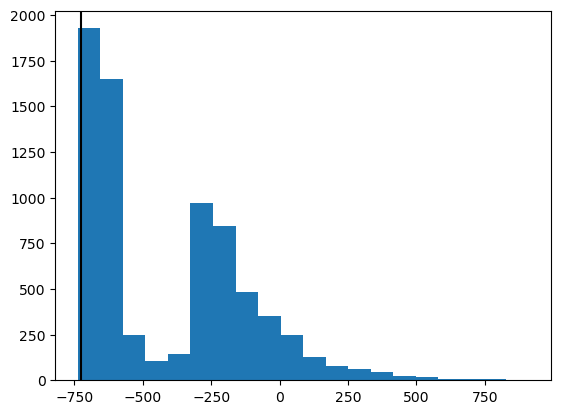

In [36]:
plt.hist(hbos.decision_scores_, bins=20)
plt.axvline(np.min(hbos.decision_scores_[np.where(outliers_hbos==1)]), c='k')
plt.show()
#l'istogramma creato con i valori di decisioni enunciati prima
#poi crea questa linea nera che delimita i valori associati
#alla classe 0 ed alla classe 1, quelli a sinistra sono tutti elementi
#associati alla classe 1(di fatto nella seconda riga del codice si
#puo leggere come si imposti la condizione che "outliers" sia uguale a 1)

In [37]:
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA

In [38]:
from sklearn.manifold import TSNE

In [39]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [40]:
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(X_train)
X_tsne.shape

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13264\1252122312.py", line 2, in <module>
    X_tsne=tsne.fit_transform(X_train)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py", line 1119, in fit_transform
    embedding = self._fit(X)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py", line 963, in _fit
    distances_nn = knn.kneighbors_graph(mode="distance")
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 988, in kneighbors_graph
    A_data, A_ind = self.kneighbors(X, n_neighbors, return_distance=True)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.compute(
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metric

In [ ]:
ellenv=EllipticEnvelope(random_state=1)
ellenv.fit(X_train)
#label approaches

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-14110.837932776536036 > -14114.780974767445514). You may want to try with a higher value of support_fraction (current value: 0.539).
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-14156.506777045407944 > -14160.871811366887414). You may want to try with a higher value of support_fraction (current value: 0.539).
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should n

In [ ]:
# predict returns 1 for an inlier and -1 for an outlier
outliers_ellenv=ellenv.predict(X_train)

In [41]:
np.unique(outliers_ellenv,return_counts=True)

(array([-1,  1]), array([ 736, 6616], dtype=int64))

In [42]:
X_train.loc[np.where(outliers_ellenv==-1)]

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
101,0.261081,-0.015636,-0.102588,-0.171239,0.201236,-0.261589,-0.217560,0.131643,-0.287320,0.022737,...,0.238314,0.278557,0.034323,0.717645,0.401581,-0.038345,-0.593632,-0.749963,0.269151,0.043100
130,0.265374,-0.017156,-0.138773,0.120362,0.083344,-0.221984,0.032087,-0.048226,-0.186745,0.531491,...,0.158396,-0.231951,-0.627031,0.140263,-0.116672,0.975040,0.594270,-0.812889,0.225554,0.040877
134,0.285213,-0.020202,-0.011024,0.122989,0.081946,0.049997,0.050769,0.012863,-0.014688,0.544512,...,0.062294,-0.346043,-0.732613,0.003646,-0.705994,0.977199,-0.174691,-0.746162,0.269038,0.058288
135,0.469946,-0.033624,-0.141254,0.115463,0.019113,-0.034471,0.096474,-0.082700,-0.048396,0.544512,...,0.422170,-0.424104,-0.768150,-0.843131,0.635292,0.905507,0.343409,-0.761985,0.262215,0.029717
136,0.235284,-0.014570,-0.208418,0.099090,0.300735,-0.206497,0.051918,0.068505,-0.186606,0.399659,...,0.335315,-0.438927,-0.728820,0.159551,0.731200,0.935449,-0.101694,-0.755776,0.266270,0.032871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7304,0.316681,-0.020640,-0.132595,0.245688,0.261090,-0.134618,0.224227,0.101366,-0.126545,0.479594,...,0.031172,-0.396526,-0.782491,-0.458666,-0.513656,0.877342,0.496022,-0.909396,0.142928,-0.028533
7305,0.311725,-0.081189,-0.137717,0.212698,-0.004871,-0.109936,0.189164,-0.026839,-0.098987,0.376801,...,0.088668,-0.580121,-0.892877,-0.151039,-0.675326,0.998341,-0.823226,-0.921291,0.140701,-0.018203
7312,0.248943,-0.003139,-0.023004,0.377844,0.164388,-0.123450,0.336749,0.097085,-0.074706,0.550500,...,0.197913,-0.016980,-0.425086,0.113251,-0.047024,0.963963,-0.980865,-0.892342,0.161155,-0.023913
7313,0.253671,-0.026880,-0.104928,0.336920,0.121086,-0.047860,0.287643,0.118948,-0.066607,0.550500,...,0.225322,-0.334509,-0.728413,0.428104,-0.273051,0.925103,-0.547828,-0.886331,0.152840,-0.041594


In [43]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=outliers_ellenv, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

# KNN

In [45]:
!pip install pyod

In [46]:
from pyod.models.knn import KNN


In [47]:
error = []

# Calculating error for K values between 1 and 40
for i in range(45,58):
    knn = KNN(n_neighbors=i, method="largest", metric= "euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(45,58), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')#, markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

C:\Users\Dell\anaconda3\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [50]:
clf=KNN(n_neighbors=47)
clf.fit(X_train)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
clf.decision_scores_

In [ ]:
anomlay_score = clf.decision_function(X_train)


In [ ]:
outliers_knn=clf.predict(X_train)
np.unique(outliers_knn, return_counts=True)

In [ ]:
plt.hist(clf.decision_scores_, bins=100)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_knn==1)]), c='k')
plt.show()

In [ ]:
np.mean(anomlay_score[np.where(outliers_knn==1)])

In [ ]:
np.mean(anomlay_score)

In [ ]:
knn.threshold_

In [ ]:
np.min(clf.negative_outlier_factor_[np.where(outliers_knn==-1)])


In [ ]:
plt.hist(clf.decision_scores_, bin=100)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_knn==1)]), c="k")
plt.show()

In [ ]:
df['outliers_knn'] = 1
for i in np.where(outliers_knn==-1):
    df['outliers_knn'][i] = 0

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers_knn'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
df['outliers'] = 0
for i in np.where(outliers_knn==1):
    df['outliers'][i] = 1

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [51]:
#LOF

In [52]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [53]:
clf=LocalOutlierFactor(n_neighbors=400
                       , novelty=True)
clf.fit(X_train)
y_pred=clf.predict(X_test)
y_pred.shape

AttributeError: 'NoneType' object has no attribute 'split'

In [1]:
fr = [10, 20, 30, 40, 50]

# Definisci la formula f0
def f0(x):
    return x * 2

# Calcola f0 per ogni elemento di fr e inserisci i risultati in una lista
result_list = [f0(x) for x in fr]

# Stampa il numero di elementi nella lista
print("Numero di elementi nella lista:", len(result_list))


Numero di elementi nella lista: 5


In [2]:
type(fr)

list